<a href="https://colab.research.google.com/github/Yutong-Lu/Datathon-4/blob/main/Rohini_Logistic_Regression_with_RFECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Necessary Libraries

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 927.2 kB/s eta 0:00:00


In [2]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings



import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import category_encoders as ce
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

warnings.filterwarnings('ignore')

#Explore Dataset

In [3]:
# Load dataset
!git clone https://github.com/Yutong-Lu/Datathon-4.git

Cloning into 'Datathon-4'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 84 (delta 35), reused 27 (delta 9), pack-reused 0
Receiving objects: 100% (84/84), 16.15 MiB | 5.69 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [4]:
cd ./Datathon-4

/content/Datathon-4


In [5]:
def get_dataframe(name):
    df = pd.read_csv(f'{name}.csv')
    return df

In [6]:
# Display data
name = 'datathon4'
data = get_dataframe(name)
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [7]:
# Explore dataset
description = data.describe()
description

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Drop patient related ID columns
data = data.drop(['encounter_id','patient_id'], axis=1)

In [9]:
# Verify columns dropped
print(list(data.columns))

['hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max

In [10]:
# Checking for missing values
print(data.isnull().sum())

hospital_id                       0
hospital_death                    0
age                            4228
bmi                            3429
elective_surgery                  0
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 184, dtype: int64


In [11]:
# Remove missing values
data = data.dropna(axis=1, thresh=data.shape[0] * (3/4))
print(data.shape)

(91713, 110)


#Split Features and Target

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Define a function to preprocess and transform input data
def fit_transform(input_data):
    # Initialize transformers and imputers
    ethnicity_transformer = ce.TargetEncoder()
    hospital_admit_source_transformer = ce.TargetEncoder()
    icu_admit_source_transformer = ce.TargetEncoder()
    icu_admit_type_transformer = ce.TargetEncoder()
    icu_type_transformer = ce.TargetEncoder()
    apache_3j_bodysystem_transformer = ce.TargetEncoder()
    apache_2_bodysystem_transformer = ce.TargetEncoder()
    imputer = IterativeImputer(max_iter=10, random_state=0)
    st_x = StandardScaler()

    # Encode 'ethnicity_transformer' column
    if 'ethnicity_transformer' in data.columns:
        data['ethnicity_transformer'] = ethnicity_transformer.fit_transform(
            data['ethnicity_transformer'].to_numpy().reshape(-1, 1), data['hospital_death'].to_numpy()
        )

    # Encode 'ethnicity_transformer' column
    if 'hospital_admit_source_transformer' in data.columns:
        data['hospital_admit_source_transformer'] = hospital_admit_source_transformer.fit_transform(
            data['hospital_admit_source_transformer'].to_numpy().reshape(-1, 1), data['hospital_death'].to_numpy()
        )

    # Encode 'ethnicity_transformer' column
    if 'icu_admit_source_transformer' in data.columns:
        data['icu_admit_source_transformer'] = icu_admit_source_transformer.fit_transform(
            data['icu_admit_source_transformer'].to_numpy().reshape(-1, 1), data['hospital_death'].to_numpy()
        )

    # Encode 'icu_type_transformer' column
    if 'icu_type_transformer' in data.columns:
        data['icu_type_transformer'] = icu_type_transformer.fit_transform(
            data['icu_type_transformer'].to_numpy().reshape(-1, 1), data['hospital_death'].to_numpy()
        )

   # Encode 'icu_type_transformer' column
    if 'apache_3j_bodysystem_transformer' in data.columns:
        data['apache_3j_bodysystem_transformer'] = apache_3j_bodysystem_transformer.fit_transform(
            data['apache_3j_bodysystem_transformer'].to_numpy().reshape(-1, 1), data['hospital_death'].to_numpy()
        )

 # Encode 'icu_type_transformer' column
    if 'apache_2_bodysystem_transformer' in data.columns:
        data['apache_2_bodysystem_transformer'] = apache_2_bodysystem_transformer.fit_transform(
            data['apache_2_bodysystem_transformer'].to_numpy().reshape(-1, 1), data['hospital_death'].to_numpy()
        )

# Perform imputation and standardization on the feature matrix
    X = imputer.fit_transform(data.drop('hospital_death', axis=1).to_numpy())
    X = st_x.fit_transform(X)

    # Extract the target variable 'Class/ASD'
    Y = data['hospital_death'].to_numpy()

    # Return the preprocessed feature matrix, target variable, and transformers/imputers
    return X, Y,  ethnicity_transformer, hospital_admit_source_transformer, icu_admit_source_transformer, icu_admit_type_transformer, icu_type_transformer, apache_3j_bodysystem_transformer, apache_2_bodysystem_transformer, imputer, st_x



In [ ]:
# Define a function to transform new data using pre-trained transformers and imputers
def transform(input_df, ethnicity_transformer, hospital_admit_source_transformer, icu_admit_source_transformer, icu_admit_type_transformer, icu_type_transformer, apache_3j_bodysystem_transformer, apache_2_bodysystem_transformer, imputer, st_x):


 # Encode 'ethnicity_transformer' column
    if 'ethnicity_transformer' in data.columns:
        data['ethnicity_transformer'] = ethnicity_transformer.transform(
            data['ethnicity_transformer'].to_numpy().reshape(-1, 1)
        )

    # Encode 'ethnicity_transformer' column
    if 'hospital_admit_source_transformer' in data.columns:
        data['hospital_admit_source_transformer'] = hospital_admit_source_transformer.transform(
            data['hospital_admit_source_transformer'].to_numpy().reshape(-1, 1)
        )

    # Encode 'ethnicity_transformer' column
    if 'icu_admit_source_transformer' in data.columns:
        data['icu_admit_source_transformer'] = icu_admit_source_transformer.transform(
            data['icu_admit_source_transformer'].to_numpy().reshape(-1, 1)
        )

    # Encode 'icu_type_transformer' column
    if 'icu_type_transformer' in data.columns:
        data['icu_type_transformer'] = icu_type_transformer.transform(
            data['icu_type_transformer'].to_numpy().reshape(-1, 1)
        )

   # Encode 'icu_type_transformer' column
    if 'apache_3j_bodysystem_transformer' in data.columns:
        data['apache_3j_bodysystem_transformer'] = apache_3j_bodysystem_transformer.transform(
            data['apache_3j_bodysystem_transformer'].to_numpy().reshape(-1, 1)
        )

 # Encode 'icu_type_transformer' column
    if 'apache_2_bodysystem_transformer' in data.columns:
        data['apache_2_bodysystem_transformer'] = apache_2_bodysystem_transformer.transform(
            data['apache_2_bodysystem_transformer'].to_numpy().reshape(-1, 1)
        )

    # Perform imputation and standardization on the feature matrix
    X = imputer.transform(data.drop('hospital_death', axis=1).to_numpy())
    X = st_x.transform(X)

    # Return the transformed feature matrix
    return X

In [13]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

In [14]:
le = LabelEncoder()
data['ethnicity'] = le.fit_transform(data['ethnicity'])
data['gender'] = le.fit_transform(data['gender'])
data['hospital_admit_source'] = le.fit_transform(data['hospital_admit_source'])
data['icu_admit_source'] = le.fit_transform(data['icu_admit_source'])
data['icu_type'] = le.fit_transform(data['icu_type'])
data['apache_3j_bodysystem'] = le.fit_transform(data['apache_3j_bodysystem'])
data['apache_2_bodysystem'] = le.fit_transform(data['apache_2_bodysystem'])
data['icu_stay_type'] = le.fit_transform(data['icu_stay_type'])

In [15]:
#Check encoding
data.head()

,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,118,0,68.0,22.73,0,2,1,180.3,4,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,81,0,77.0,27.42,0,2,0,160.0,4,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,118,0,25.0,31.95,0,2,0,172.7,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,118,0,81.0,22.64,1,2,0,165.1,8,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,33,0,19.0,NaN,0,2,1,188.0,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7


In [16]:
# Split data into features and target
X = data.drop('hospital_death', axis=1)
y = data['hospital_death']

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [18]:
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test = imputer.transform(X_test)

In [19]:
scaler = StandardScaler() #Scales to mean of 0, SD of 1
X_train = scaler.fit_transform(X_train) #Calculates mean and SD, then scales
X_test = scaler.transform(X_test) #Applies same scaling to test set

#Initialize Logistic Regression

In [20]:
# Initialize a Logistic Regression model
model = LogisticRegression()

In [21]:
# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

#Initialize RFECV

In [22]:
# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC in this case)
    min_features_to_select=1,
)

In [23]:
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='roc_auc')

#Optimal Number of Features

In [24]:
# Print the
optimal_num_features = rfecv.n_features_
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 102


In [25]:
# Features ranking low
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

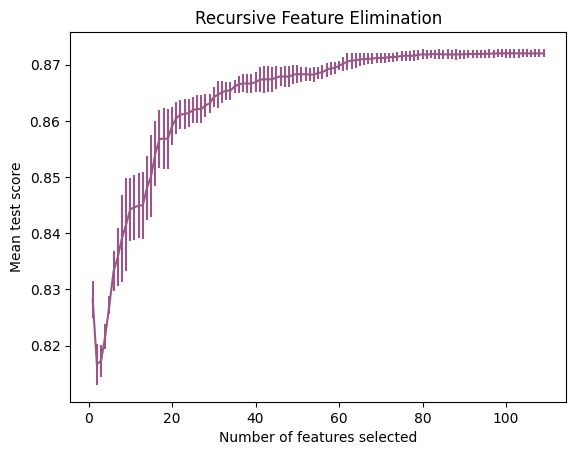

In [27]:
# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()

# Inflection point around 2-3, optimal number is 102

#Train LR with Selected Features

In [28]:
# Fit and transform training and test data
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [29]:
# Preprocess and transform the training and test sets
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [30]:
# Select only the features that were chosen by RFECV
X_train = X_train[:, rfecv.support_]
X_test = X_test[:, rfecv.support_]

In [31]:
# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [34]:
# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

In [35]:
# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

======== Training Set ==========
AUC :  0.798557207540739
Accuracy :  0.9252146653945754
Confusion Matrix:
[[66184  4621]
 [  866  1699]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     70805
           1       0.27      0.66      0.38      2565

    accuracy                           0.93     73370
   macro avg       0.63      0.80      0.67     73370
weighted avg       0.96      0.93      0.94     73370



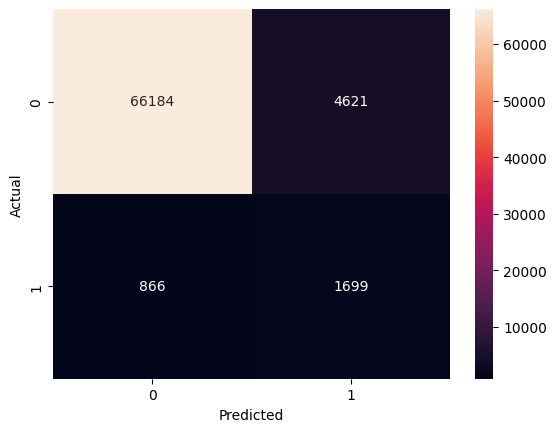

In [36]:
sns.heatmap(conf_matrix_train, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

======== Test Set ==========
AUC :  0.7899352693366909
Accuracy :  0.9228588562394374
Confusion Matrix:
[[16533  1200]
 [  215   395]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     17733
           1       0.25      0.65      0.36       610

    accuracy                           0.92     18343
   macro avg       0.62      0.79      0.66     18343
weighted avg       0.96      0.92      0.94     18343



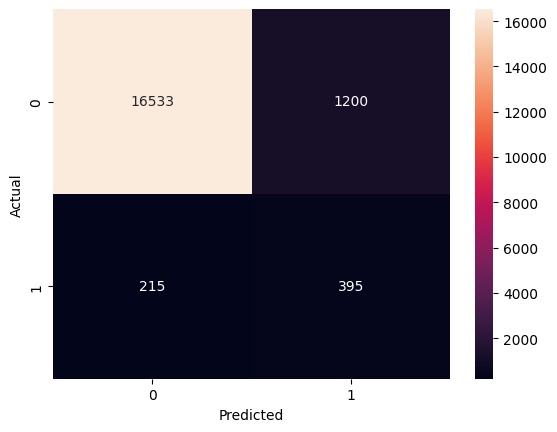

In [38]:
sns.heatmap(conf_matrix_test, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

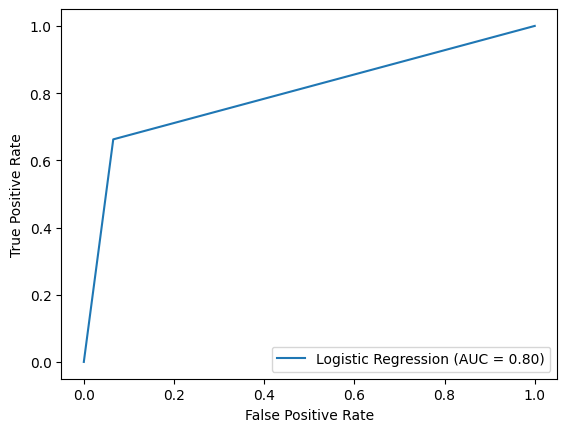

In [39]:
# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

#Evaluate Model

In [40]:
selected_features = X.columns[rfecv.support_]

In [43]:
# Evaluation metrics on train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_confusion_matrix = confusion_matrix(y_train, y_pred_train)

In [44]:
# Evaluation metrics on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_confusion_matrix = confusion_matrix(y_test, y_pred_test)

In [45]:
summary_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
}

summary_df = pd.DataFrame(summary_data)

print("Summary Report:")
print(summary_df)

print("\nSelected Features:")
print(selected_features)


Summary Report:
      Metric  Train Set  Test Set
0   Accuracy   0.925215  0.922859
1  Precision   0.662378  0.647541
2     Recall   0.268829  0.247649
3   F1 Score   0.382442  0.358277

Selected Features:
Index(['hospital_id', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender',
       'height', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type',
       ...
       'apache_4a_hospital_death_prob', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=102)
